In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# 1. Data Analysis:
- isna(), info(), decribe(), crosstab()
- plots
- correlation matrix 
- sort data by date

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 2. Handling Features:
- Check isna().sum() for each feature, if not significant proceed
- Make the feature ready for one hot encoding
- Remove unique values which has less number of counts
- Modify and clean the values in each feature column accordingly

In [6]:
# categorical features
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [7]:
# Item weight
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

C:\Users\Gokuleshwaran\AppData\Local\Temp\ipykernel_9688\2297728295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Outlet size
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [10]:
# fill missing values
df['Outlet_Size'].fillna('Medium', inplace=True)

C:\Users\Gokuleshwaran\AppData\Local\Temp\ipykernel_9688\2381311465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outlet_Size'].fillna('Medium', inplace=True)


In [11]:
# check missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
# Item Fat Content
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [13]:
# replace LF, low fat with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
# replace reg with Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg': 'Regular'})

In [14]:
# check
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [15]:
# Item type
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [16]:
# Outlet Identifier
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [17]:
# Outlet Establishment Year
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [18]:
# Outlet Size
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [19]:
# Outlet Location Type
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [20]:
# Outlet Type
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [21]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 3. Convert Categorical Features into Numericals 
- One hot encoder: Lasso or Ridge
- Label encoding: XGBoost and RandomForest
- Lower cardinality columns: One hot encoding
- High cardinality columns: Target encoding, Ordinal encoding
- Convert to category
- https://www.kaggle.com/code/gokuleshwaran/feature-engineering-for-house-prices/edit

In [22]:
# Label encoding
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

# Item_Fat_Content: Low Fat: 0, Regular: 1
# Outlet_Size: High: 0, Medium: 1, Small: 2
# Outlet_Location_Type: Tier 1: 0, Tier 2: 1, Tier 3: 2
# Outlet_Type: Grocery Store: 0, Supermarket Type1: 1, Supermarket Type2: 2, Supermarket Type3: 3
# Item_Type: 0-15


In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


<Axes: >

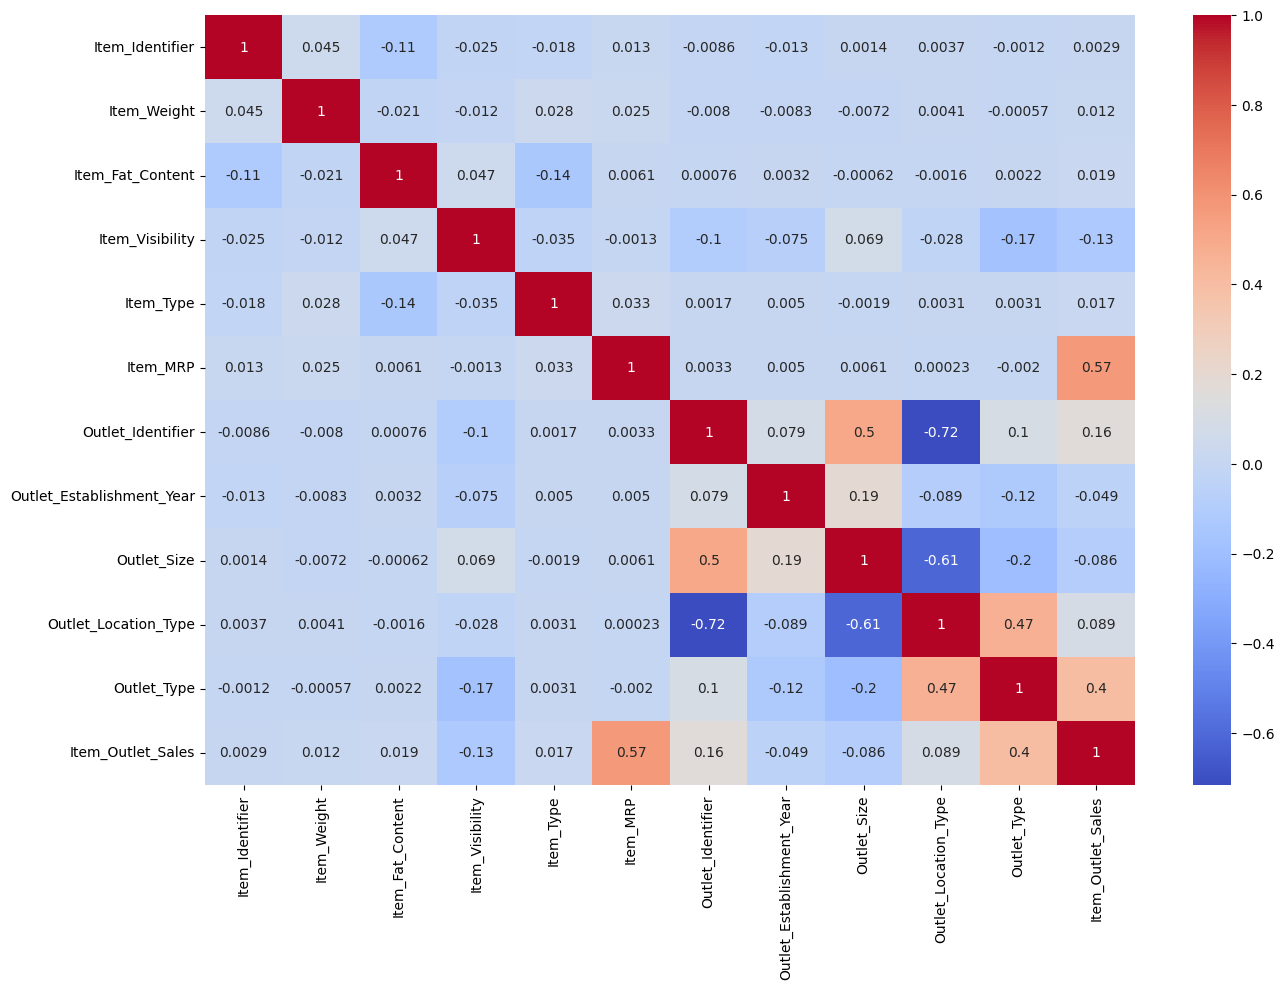

In [25]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# 4. Split the data into x and y label

In [26]:
# split data
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

# 5. Split the data into x_train, x_test, y_train, y_test

In [27]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.shape, X_test.shape

((6818, 11), (1705, 11))

# 6. Evaluation
- show_scores(model, x_train, x_test, y_train, y_test)
- score_dataset()
- y_preds = model.predict()
- y_probs = model.predict_proba()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import numpy as np
def show_scores(model, x_train, x_test, y_train, y_test):
  # Calculate the model's predictions
  train_preds = model.predict(x_train)
  test_preds = model.predict(x_test)

  # Evaluate the model's performance using various metrics
  mae_train = mean_absolute_error(y_train, train_preds)
  mae_test = mean_absolute_error(y_test, test_preds)
  mse_train = mean_squared_error(y_train, train_preds)
  mse_test = mean_squared_error(y_test, test_preds)
  r2_train = r2_score(y_train, train_preds)
  r2_test = r2_score(y_test, test_preds)

  # Print the results
  print("Model:", model.__class__.__name__)
  print("-" * 30)
  print("Training set:")
  print("- RMSE:", np.sqrt(mse_train))
  print("- MAE:", mae_train)
  print("- R2 Score:", r2_train)
  print("-" * 30)
  print("Test set:")
  print("- RMSE:", np.sqrt(mse_test))
  print("- MAE:", mae_test)
  print("- R2 Score:", r2_test)

# 7. Fit the train data into models
- compare the aaccuracy or other metrics.

In [30]:
# XGBoost Regressor
xb = XGBRegressor()

In [31]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [32]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [35]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

In [36]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

In [37]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [38]:
y_test.head()

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
Name: Item_Outlet_Sales, dtype: float64

In [39]:
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,1487,14.500000,0,0.089960,8,159.5604,7,2002,1,1,1
4148,392,12.857645,0,0.009535,13,64.5510,5,1985,1,2,3
7423,1396,11.500000,0,0.017742,8,129.6626,2,2007,1,1,1
4836,642,10.195000,0,0.000000,5,143.1154,2,2007,1,1,1
944,436,21.000000,0,0.049264,13,195.0478,1,1987,0,2,1


In [45]:
models = [xb, rf, dt, lr, lasso, ridge, en]
for model in models:
    print(f"Training {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    show_scores(model, X_train, X_test, y_train, y_test)
    print("\n")

Training XGBRegressor...
Model: XGBRegressor
------------------------------
Training set:
- RMSE: 591.5678740776044
- MAE: 427.24114787156066
- R2 Score: 0.8796589818207333
------------------------------
Test set:
- RMSE: 1231.377516382708
- MAE: 870.1880407876561
- R2 Score: 0.48193939193781665


Training RandomForestRegressor...
Model: RandomForestRegressor
------------------------------
Training set:
- RMSE: 422.37872769091837
- MAE: 291.3172881537107
- R2 Score: 0.9386508436351029
------------------------------
Test set:
- RMSE: 1158.5883955370205
- MAE: 824.3937474392962
- R2 Score: 0.5413763141346677


Training DecisionTreeRegressor...
Model: DecisionTreeRegressor
------------------------------
Training set:
- RMSE: 0.0
- MAE: 0.0
- R2 Score: 1.0
------------------------------
Test set:
- RMSE: 1612.821951765539
- MAE: 1111.9933870967743
- R2 Score: 0.11126766077907857


Training LinearRegression...
Model: LinearRegression
------------------------------
Training set:
- RMSE: 1194

# 8. Tune hyperparameters 
- RandomizedSearchCV
- GridSearchCV 
(on subset to reduce training time by adjusting max_samples parameter)

In [48]:
# XGBoost Regressor hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
min_child_weight = [3, 4, 5, 6, 7]
subsample = [0.7, 0.6, 0.8]
colsample_bytree = [0.7, 0.6, 0.8]
reg_alpha = [0.01, 0.1, 1, 0.001, 0.0001]
reg_lambda = [0.01, 0.1, 1, 0.001, 0.0001]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha,
               'reg_lambda': reg_lambda}
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
xb_random = RandomizedSearchCV(estimator=xb, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
xb_random.fit(X_train, y_train)

# best parameters
xb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'subsample': 0.8,
 'reg_lambda': 0.01,
 'reg_alpha': 0.001,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.7}

In [49]:
show_scores(xb_random, X_train, X_test, y_train, y_test)

Model: RandomizedSearchCV
------------------------------
Training set:
- RMSE: 1009.6454679280563
- MAE: 707.2303972025605
- R2 Score: 0.6494561759855619
------------------------------
Test set:
- RMSE: 1099.83308643051
- MAE: 779.7253224833089
- R2 Score: 0.5867130494319003


In [49]:
# save the model
# {'subsample': 0.8,
#  'reg_lambda': 0.01,
#  'reg_alpha': 0.001,
#  'n_estimators': 100,
#  'min_child_weight': 6,
#  'max_depth': 5,
#  'learning_rate': 0.05,
#  'colsample_bytree': 0.7}
best_model = XGBRegressor(subsample=0.8, reg_lambda=0.01, reg_alpha=0.001, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.05, colsample_bytree=0.7)
X_test_modified = X_test.drop(columns='Item_Identifier')
X_train_modified = X_train.drop(columns='Item_Identifier')
best_model.fit(X_train_modified, y_train)
show_scores(best_model, X_train_modified, X_test_modified, y_train, y_test)

Model: XGBRegressor
------------------------------
Training set:
- RMSE: 1010.6247235054478
- MAE: 708.7257674674541
- R2 Score: 0.6487758610125854
------------------------------
Test set:
- RMSE: 1091.5036399999801
- MAE: 775.2761291206052
- R2 Score: 0.5929492975907658


In [50]:
# Save the model
import joblib
joblib.dump(best_model, 'big_mart_sales_model')

['big_mart_sales_model']

In [51]:
X_test_modified.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,14.500000,0,0.089960,8,159.5604,7,2002,1,1,1
4148,12.857645,0,0.009535,13,64.5510,5,1985,1,2,3
7423,11.500000,0,0.017742,8,129.6626,2,2007,1,1,1
4836,10.195000,0,0.000000,5,143.1154,2,2007,1,1,1
944,21.000000,0,0.049264,13,195.0478,1,1987,0,2,1


In [52]:
X_test_modified.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [47]:
len(X_test['Item_Identifier'].unique()

1081